In [3]:
# Imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypdf import PdfWriter

from geoscripts import gchemplots as gp
from geoscripts import gchemcalc as gc

from matplotlib import rc
rc("pdf", fonttype=42)

pd.options.mode.copy_on_write = True

2024-07-23 14:22:58,757 pyrolite.util.plot.helpers - WARNING: scikit-learn not installed
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/mpltern/ternary/datasets.py:9: UserWarning: `mpltern.ternary.datasets.py` has been moved to `mpltern.datasets.py` and will be removed from the present directory in mpltern 0.6.0.
  warnings.warn(msg)


In [4]:
# Set up directory
savedir = 'draft_figs/'
os.makedirs(savedir,exist_ok=True)

In [5]:
# New Data
data = pd.read_csv('processed/data.csv',index_col=0)

# Filter for J
filter_period = (data['Period']=='Jurassic')|(data['Period']=='Jurassic?')
data_filt = data[filter_period]
print(data_filt.index)

Index(['G22019', 'G22020', 'G22032A', 'G22033', 'G22034', 'G22035', 'G22036A',
       'G22037', 'G22038', 'G22039', 'G22041A', 'G22041C', 'G22042', 'G22044',
       'G22045', 'G22046C', 'G22049', 'G22051', 'G22053', 'G22063', 'G22065',
       'G22066', 'G22067', 'G22068A', 'G22068B', 'G22068C', 'G22069', 'G22076',
       'G22081', 'G22091', 'G22092', 'G22094', 'G22096', 'G22108A', 'G22109',
       'G22110', 'G22111', 'G22114', 'G22118', 'G22119', 'G22125', 'G22126',
       'G22129', 'G22130', 'G22131', 'G22141', 'C17069B', '100311-3A'],
      dtype='object')


In [6]:
# Groups
khaishi_core_smps = ['G22034','G22035','G22036A','G22037','G22038','G22039']
data_filt.loc[khaishi_core_smps,'S_Domain'] = 'Khaishi Core'

limb_condition = (~data_filt.index.isin(khaishi_core_smps)) & (data_filt['S_Domain'] == 'Khaishi')
data_filt.loc[limb_condition,'S_Domain'] = 'Khaishi Limbs'

group_dict = {'Khaishi Core':'Khaishi Core','Khaishi Limbs':'Khaishi Limbs','Idliani':'Idliani','Jvari':'Jvari','Lentekhi':'Lentekhi','Mazashi':'Mazashi','Panaga':'Lentekhi',
              'Tsageri-Khvamli':'Khvamli','Dzirula':np.nan,'Pasanauri':np.nan,'Dizi':np.nan,'Cretaceous Intrusive':np.nan}

chem_group = data_filt['S_Domain'].map(group_dict)

groups = data_filt.groupby(chem_group,sort=False)

color_dict = {'Khaishi Core':'#88CCEE','Khaishi Limbs':'#44AA99','Idliani':'#117733','Jvari':'#999933','Lentekhi':'#AA4499','Mazashi':'#882255','Khvamli':'#CC6677',
              np.nan:'#DDDDDD'}

axes_dict = {'Khaishi Core':(0,0),'Khaishi Limbs':(0,0),'Idliani':(1,0),'Jvari':(2,0),'Lentekhi':(0,1),'Mazashi':(1,1),'Khvamli':(2,1)}

In [7]:
# Save Data
data_filt['Color'] = chem_group.map(color_dict)
plot_data = data_filt[data_filt['Color']!='#DDDDDD']

plot_data.to_csv(savedir+'data.csv')

In [39]:
# Organize data into table
data_filt['Geochemical Domain'] = chem_group
columns = ['Latitude','Longitude','Rock_Type','Geochemical Domain','SiO2','TiO2','Al2O3','FeO*','MnO','MgO','CaO','Na2O','K2O','P2O5','Ni','Cr','V','Ga','Cu','Zn','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Ba','Th','Nb','Y','Hf','Ta','U','Pb','Rb','Cs','Sr','Sc','Zr']
table = data_filt[columns].rename(columns={'Rock_Type':'Lithology'})
table.dropna(subset=['Geochemical Domain'],inplace=True)
table.index.name = 'Sample'

table.replace({'Breccia':'Volcaniclastic','Intermed. Volcanic':'Andesite','Sandstone':'Volcaniclastic'},inplace=True)
intermed_condition = (table['SiO2']>57) & (table['Lithology']=='Mafic Intrusive')

table.loc[intermed_condition,'Lithology'] = 'Intermediate Intrusive'

table.to_csv('TableS1.csv')


In [9]:
# Old Data
gale = pd.read_csv('processed/data_gale.csv')

cbab = pd.read_excel('published/Vasey_CaucArc_TableS4.xlsx',header=1)
spreading_cond = cbab['Region'].isin(['Okinawa Trough','Bransfield Strait','Tyrrhenian Sea'])
cbab_spread = cbab[spreading_cond]

avgs_raw = pd.read_csv('published/Vasey21_avgs.csv',header=0,index_col=0)
avgs = avgs_raw.loc[['D-MORB','E-MORB','Oceanic Arc','OIB'],:]
avgs_colors = {'D-MORB':'#997700','E-MORB':'#EECC66','Oceanic Arc':'#6699CC','OIB':'#EE99AA'}

mc_cond = cbab['Source']=='McCann et al., 2010'
mc = cbab[mc_cond]

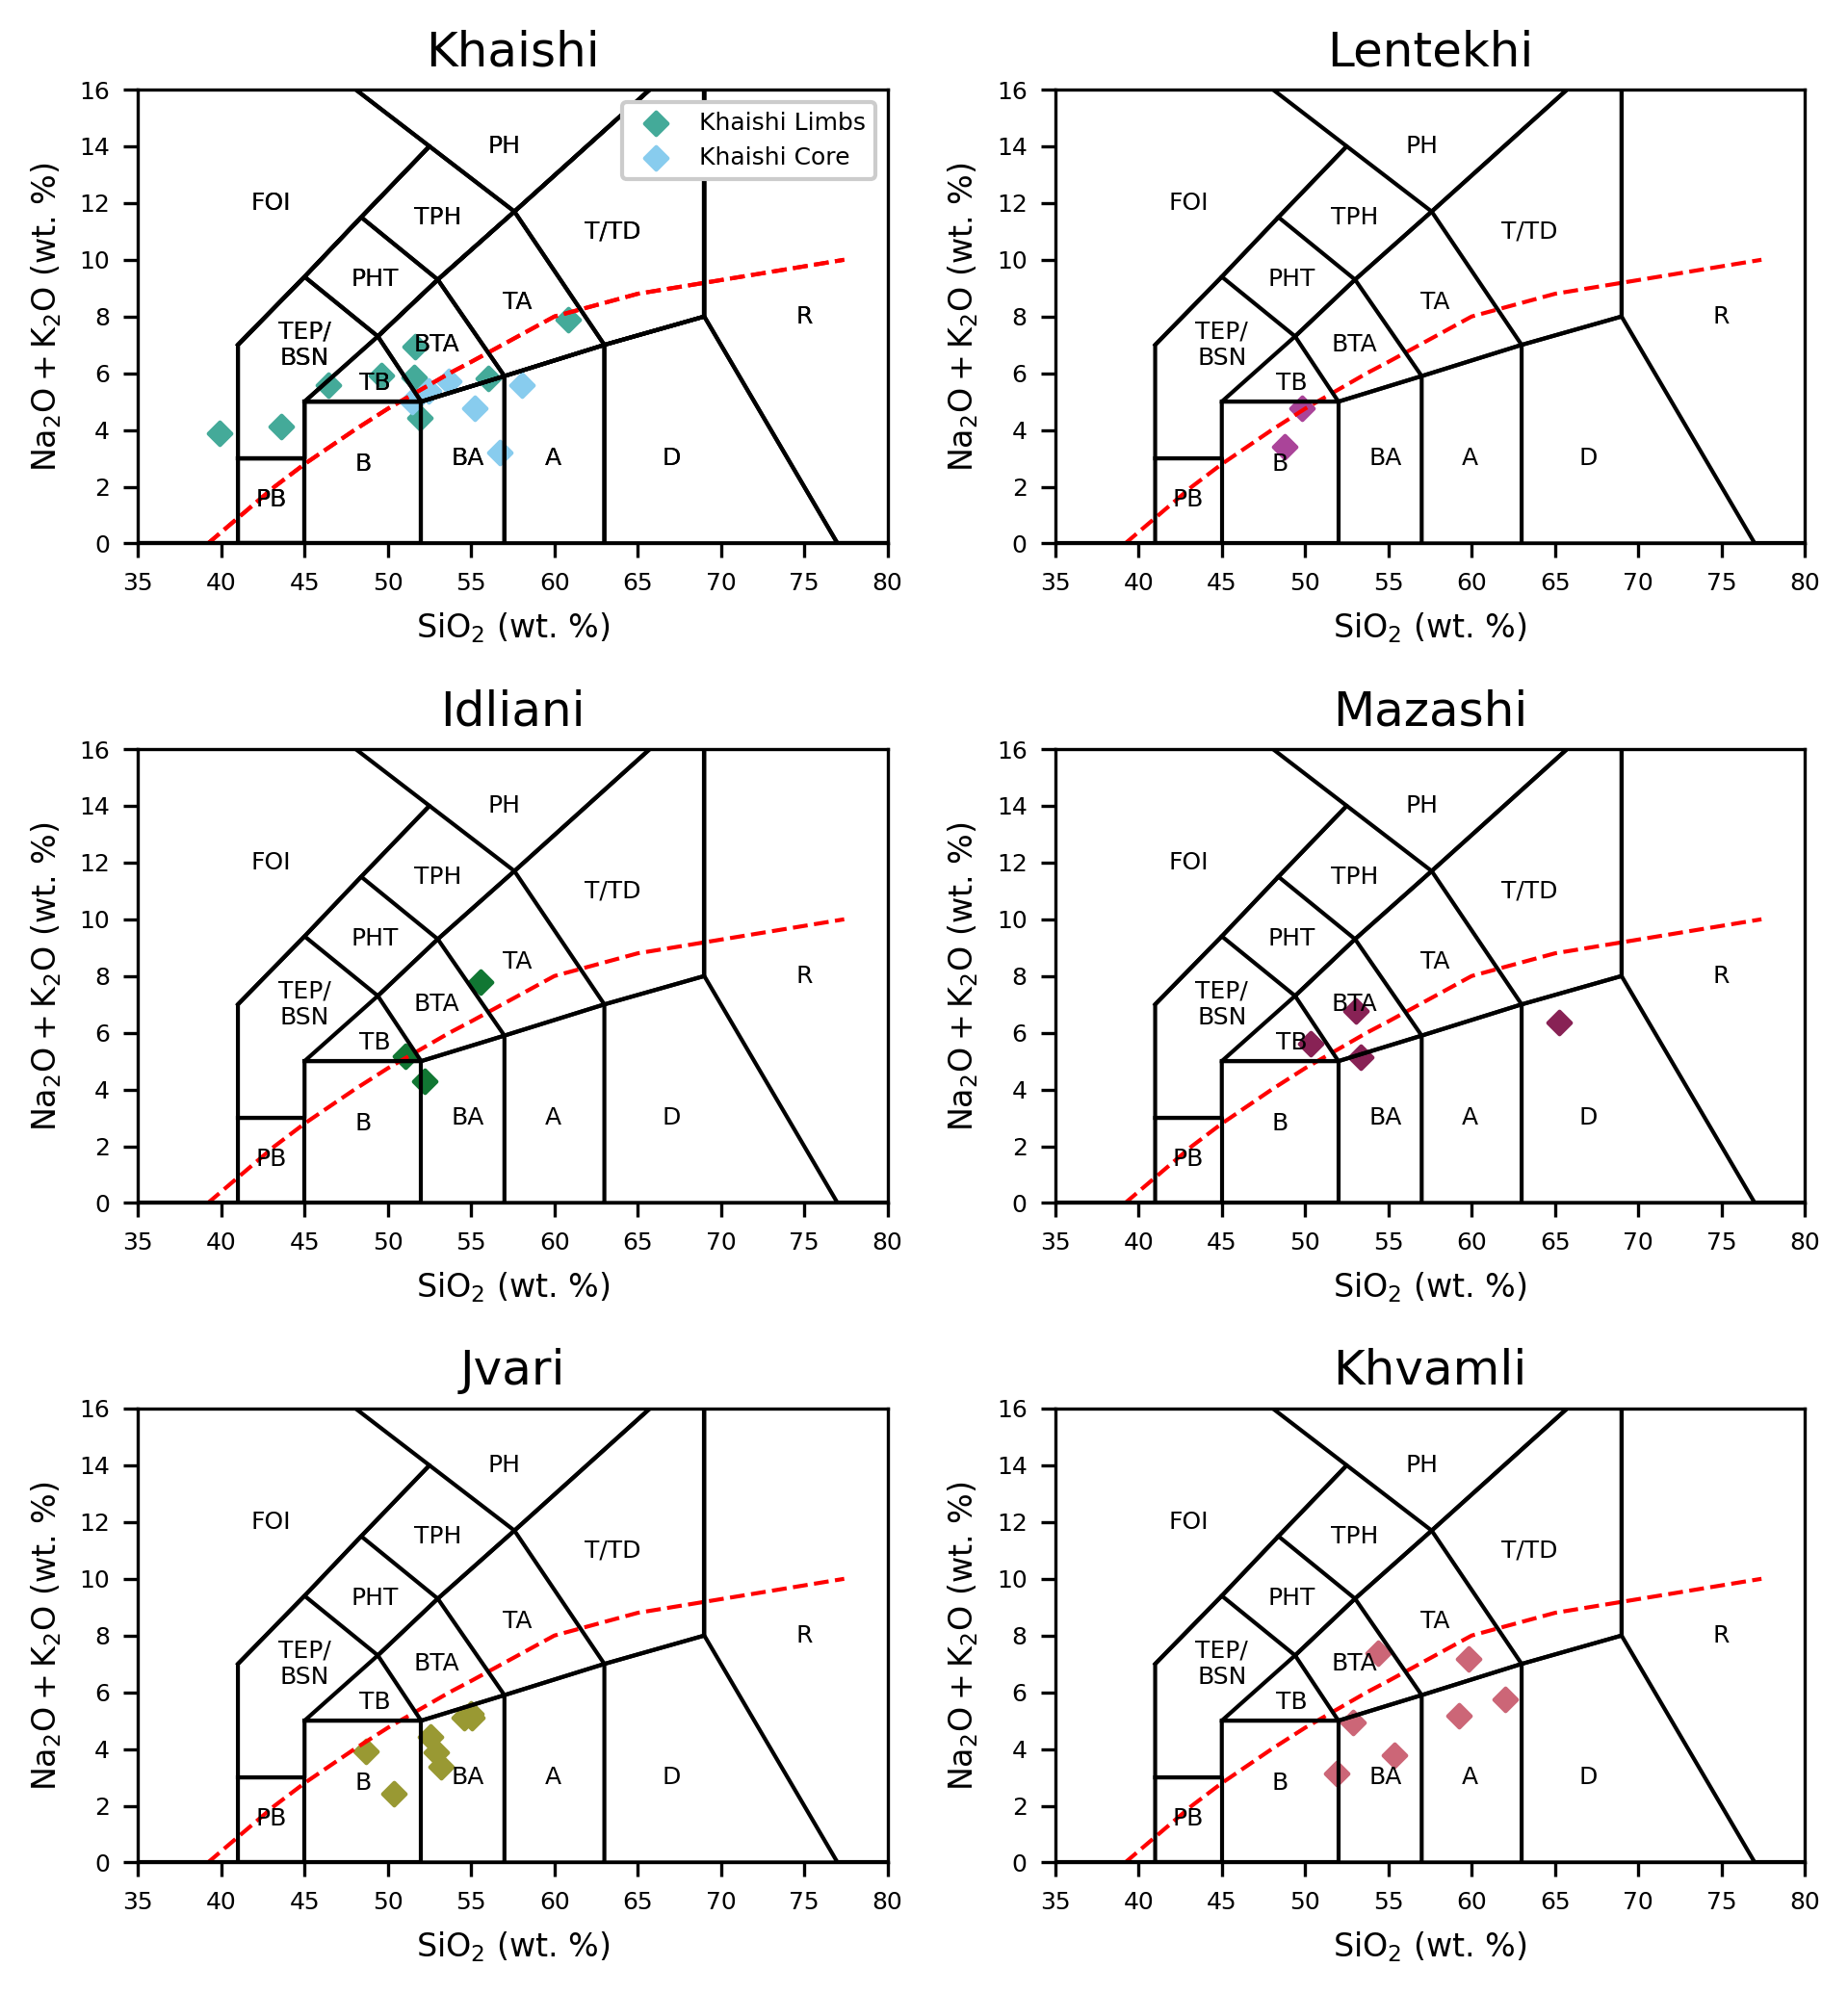

In [10]:
# TAS
fig,axs = plt.subplots(3,2,dpi=300,figsize=(6.5,7))

for k, group in groups:
    ax = axs[axes_dict[k]]
    color = color_dict[k]
    SiO2,Na2O,K2O = group[['SiO2','Na2O','K2O']].T.values
    gp.TASsm(SiO2,Na2O,K2O,label=k,ax=ax,color=color,first=[])
    ax.set_title(k)
axs[0,0].set_title('Khaishi')
axs[0,0].legend(fontsize=6,loc='upper right',frameon=True,framealpha=1,facecolor='white')

plt.tight_layout()

fig.savefig(savedir+'F04_TAS.pdf')

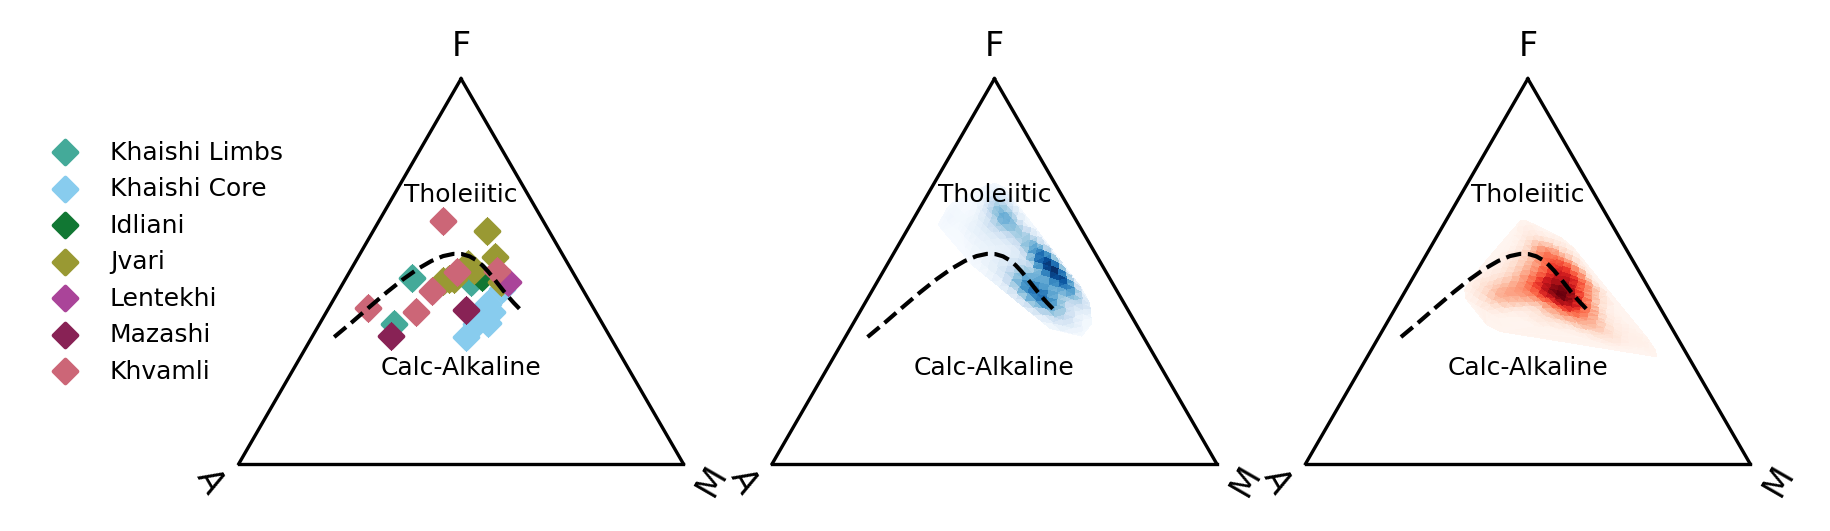

In [11]:
# AFM
fig,axs = plt.subplots(1,3,figsize=(6.5,3),dpi=300,subplot_kw={'projection':'ternary'})

first = []
for k,group in groups:
    group_sub = gc.classifyAlkaline(group)
    group_filt = group[group_sub]

    gp.afm(Na2O=group_filt['Na2O'],K2O=group_filt['K2O'],FeOt=group_filt['FeO*'],MgO=group_filt['MgO'],ax=axs[0],scatter=True,
       density=False,scatter_kwargs={'color':color_dict[k],'label':k},first=first)

gale_sub = gc.classifyAlkaline(gale)
gale_filt = gale[gale_sub]

gp.afm(Na2O=gale_filt['Na2O'],K2O=gale_filt['K2O'],FeOt=gale_filt['FeOt'],MgO=gale_filt['MgO'],ax=axs[1],scatter=False,
       density=True,first=[],density_kwargs={'cmap':'Blues'})

cbab_sub = gc.classifyAlkaline(cbab_spread)
cbab_filt = cbab_spread[cbab_sub]

gp.afm(Na2O=cbab_filt['Na2O'],K2O=cbab_filt['K2O'],FeOt=cbab_filt['FeOt'],MgO=cbab_filt['MgO'],ax=axs[2],scatter=False,
       density=True,first=[],density_kwargs={'cmap':'Reds'})

axs[0].legend(fontsize=6,loc='best',bbox_to_anchor=(0.15,0.9))

fig.savefig(savedir+'F05_AFM.pdf')

4
4
4
4
4


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWar

4
4
4
4
4
4
4
4
4


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWar

1
1
1
1
1
1
1
1
1
1


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/home/dyvasey/git/geoscripts/geoscripts/gchemplots.py:501: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(pti_ppm)
/home/dyvasey/git/geoscripts/geoscripts/gchemplots.py:501: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(pti_ppm)
/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolit

1
1


/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


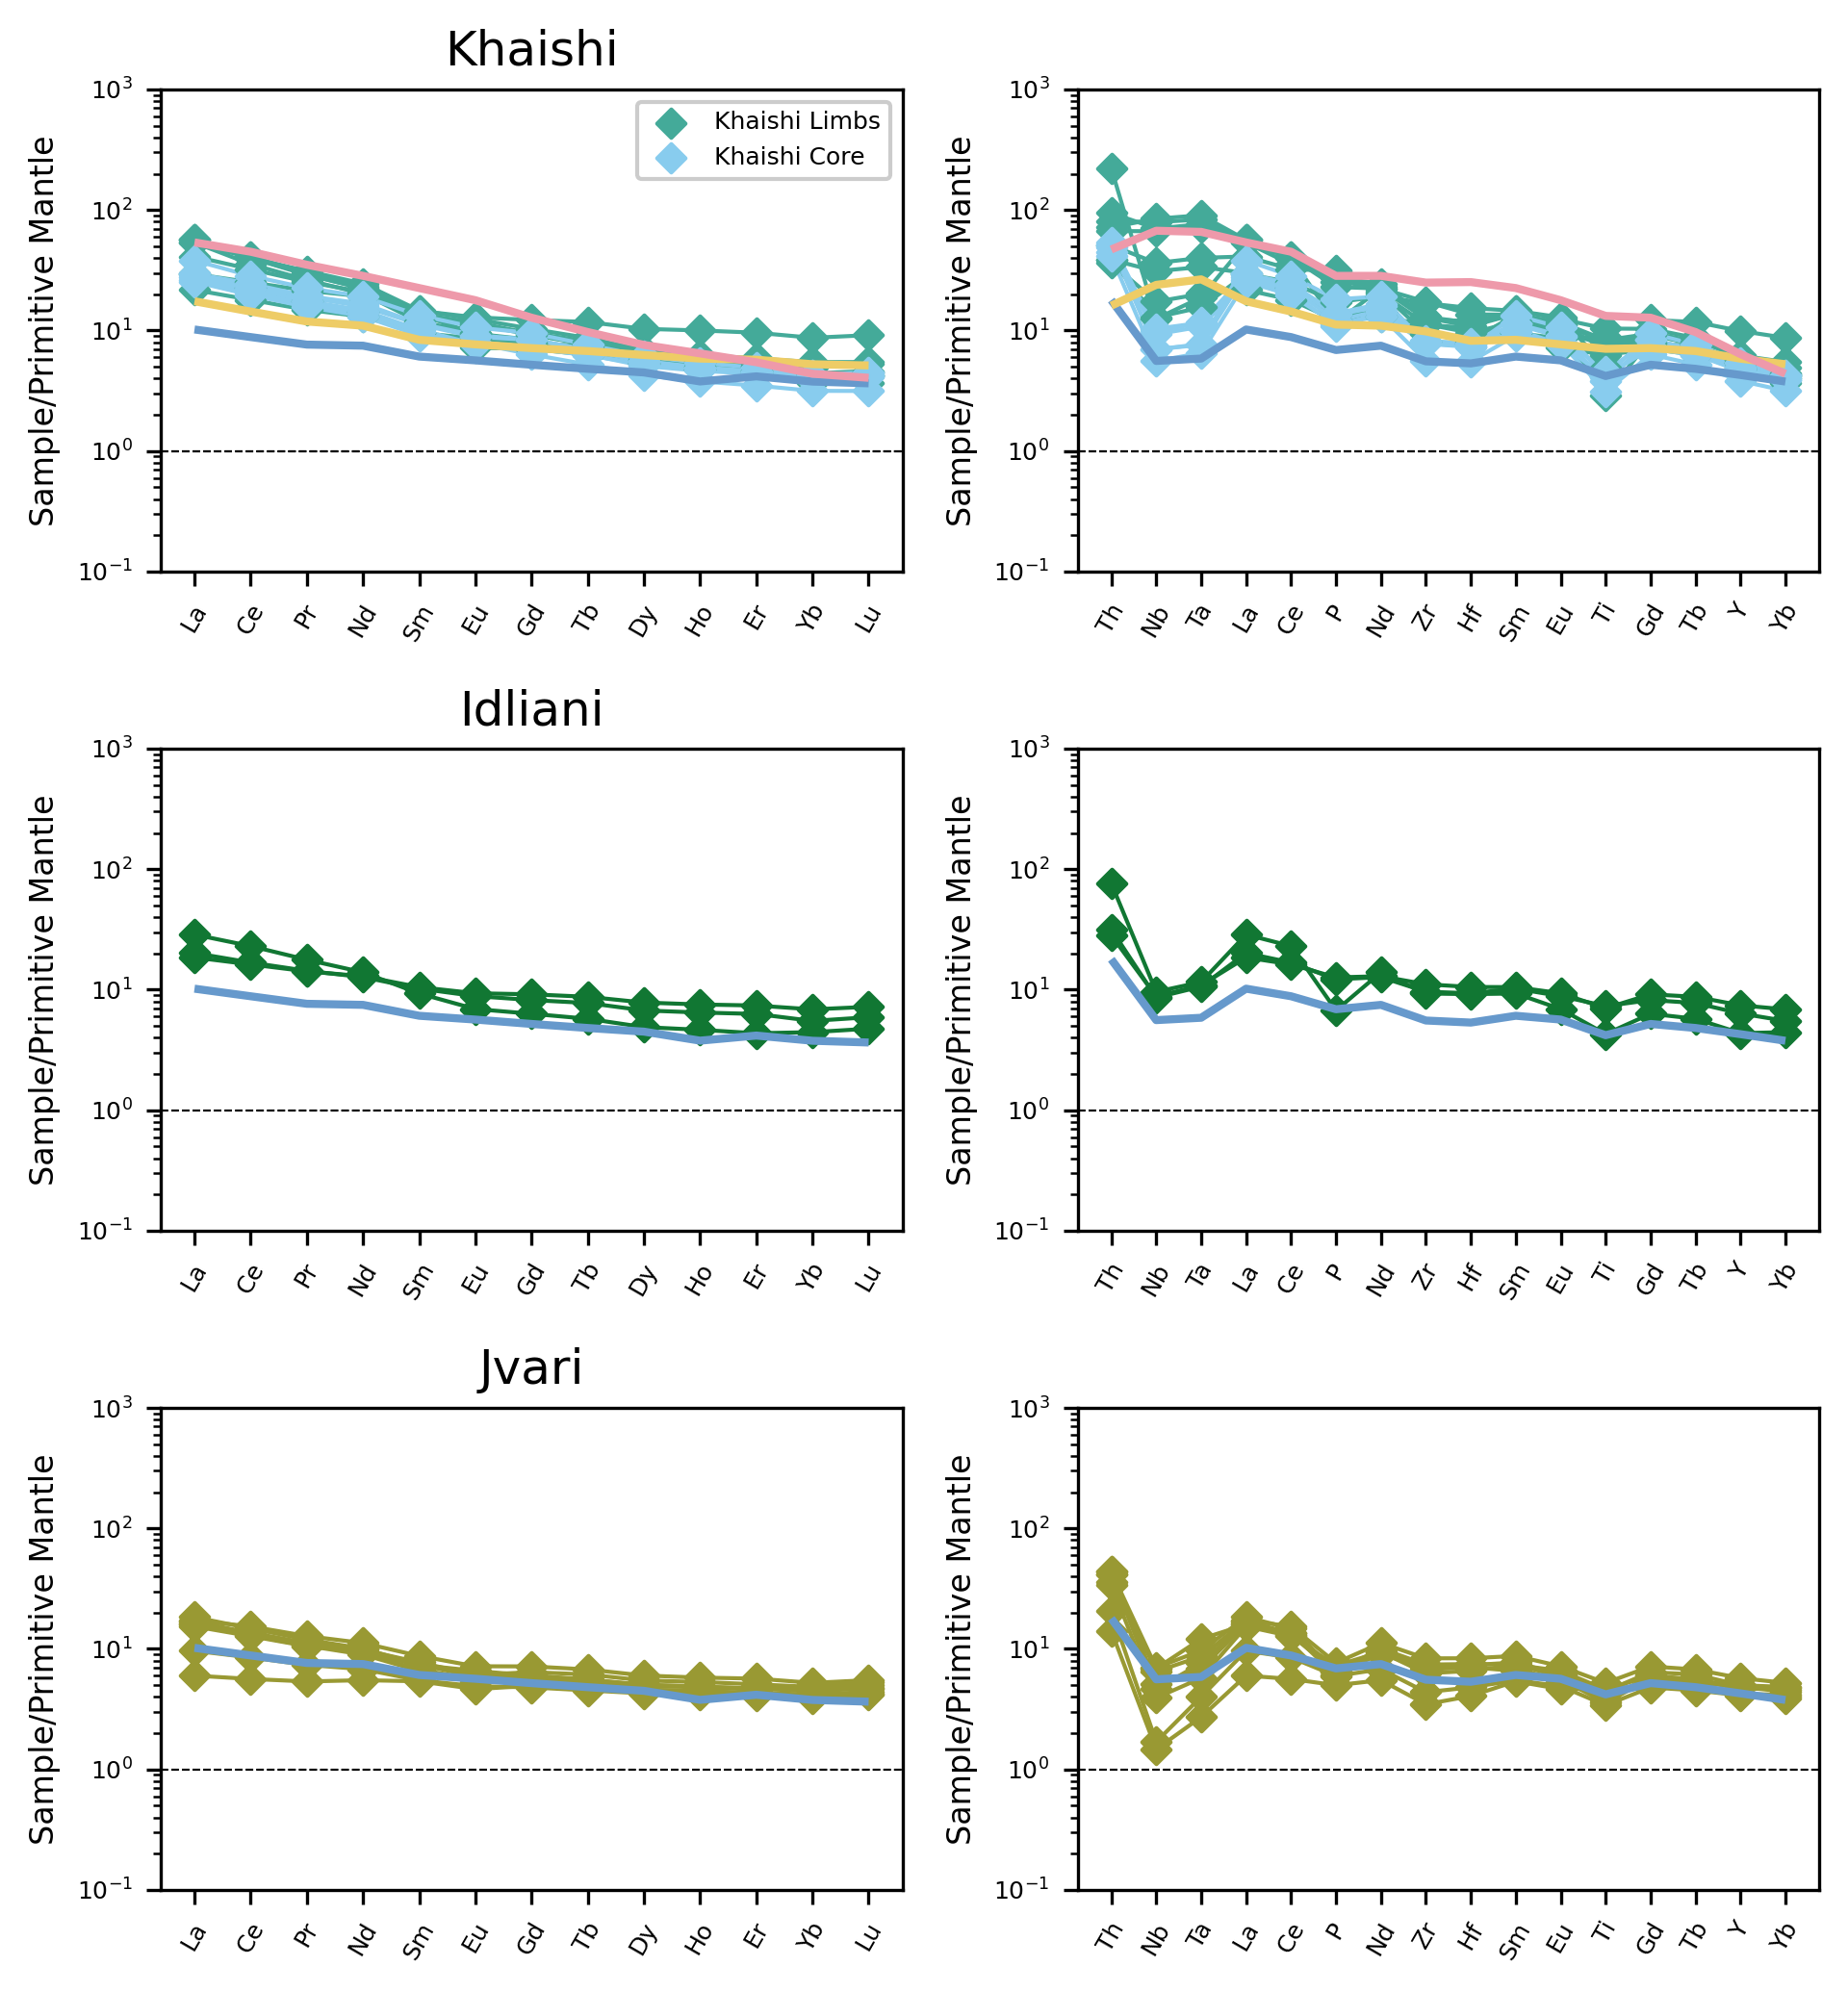

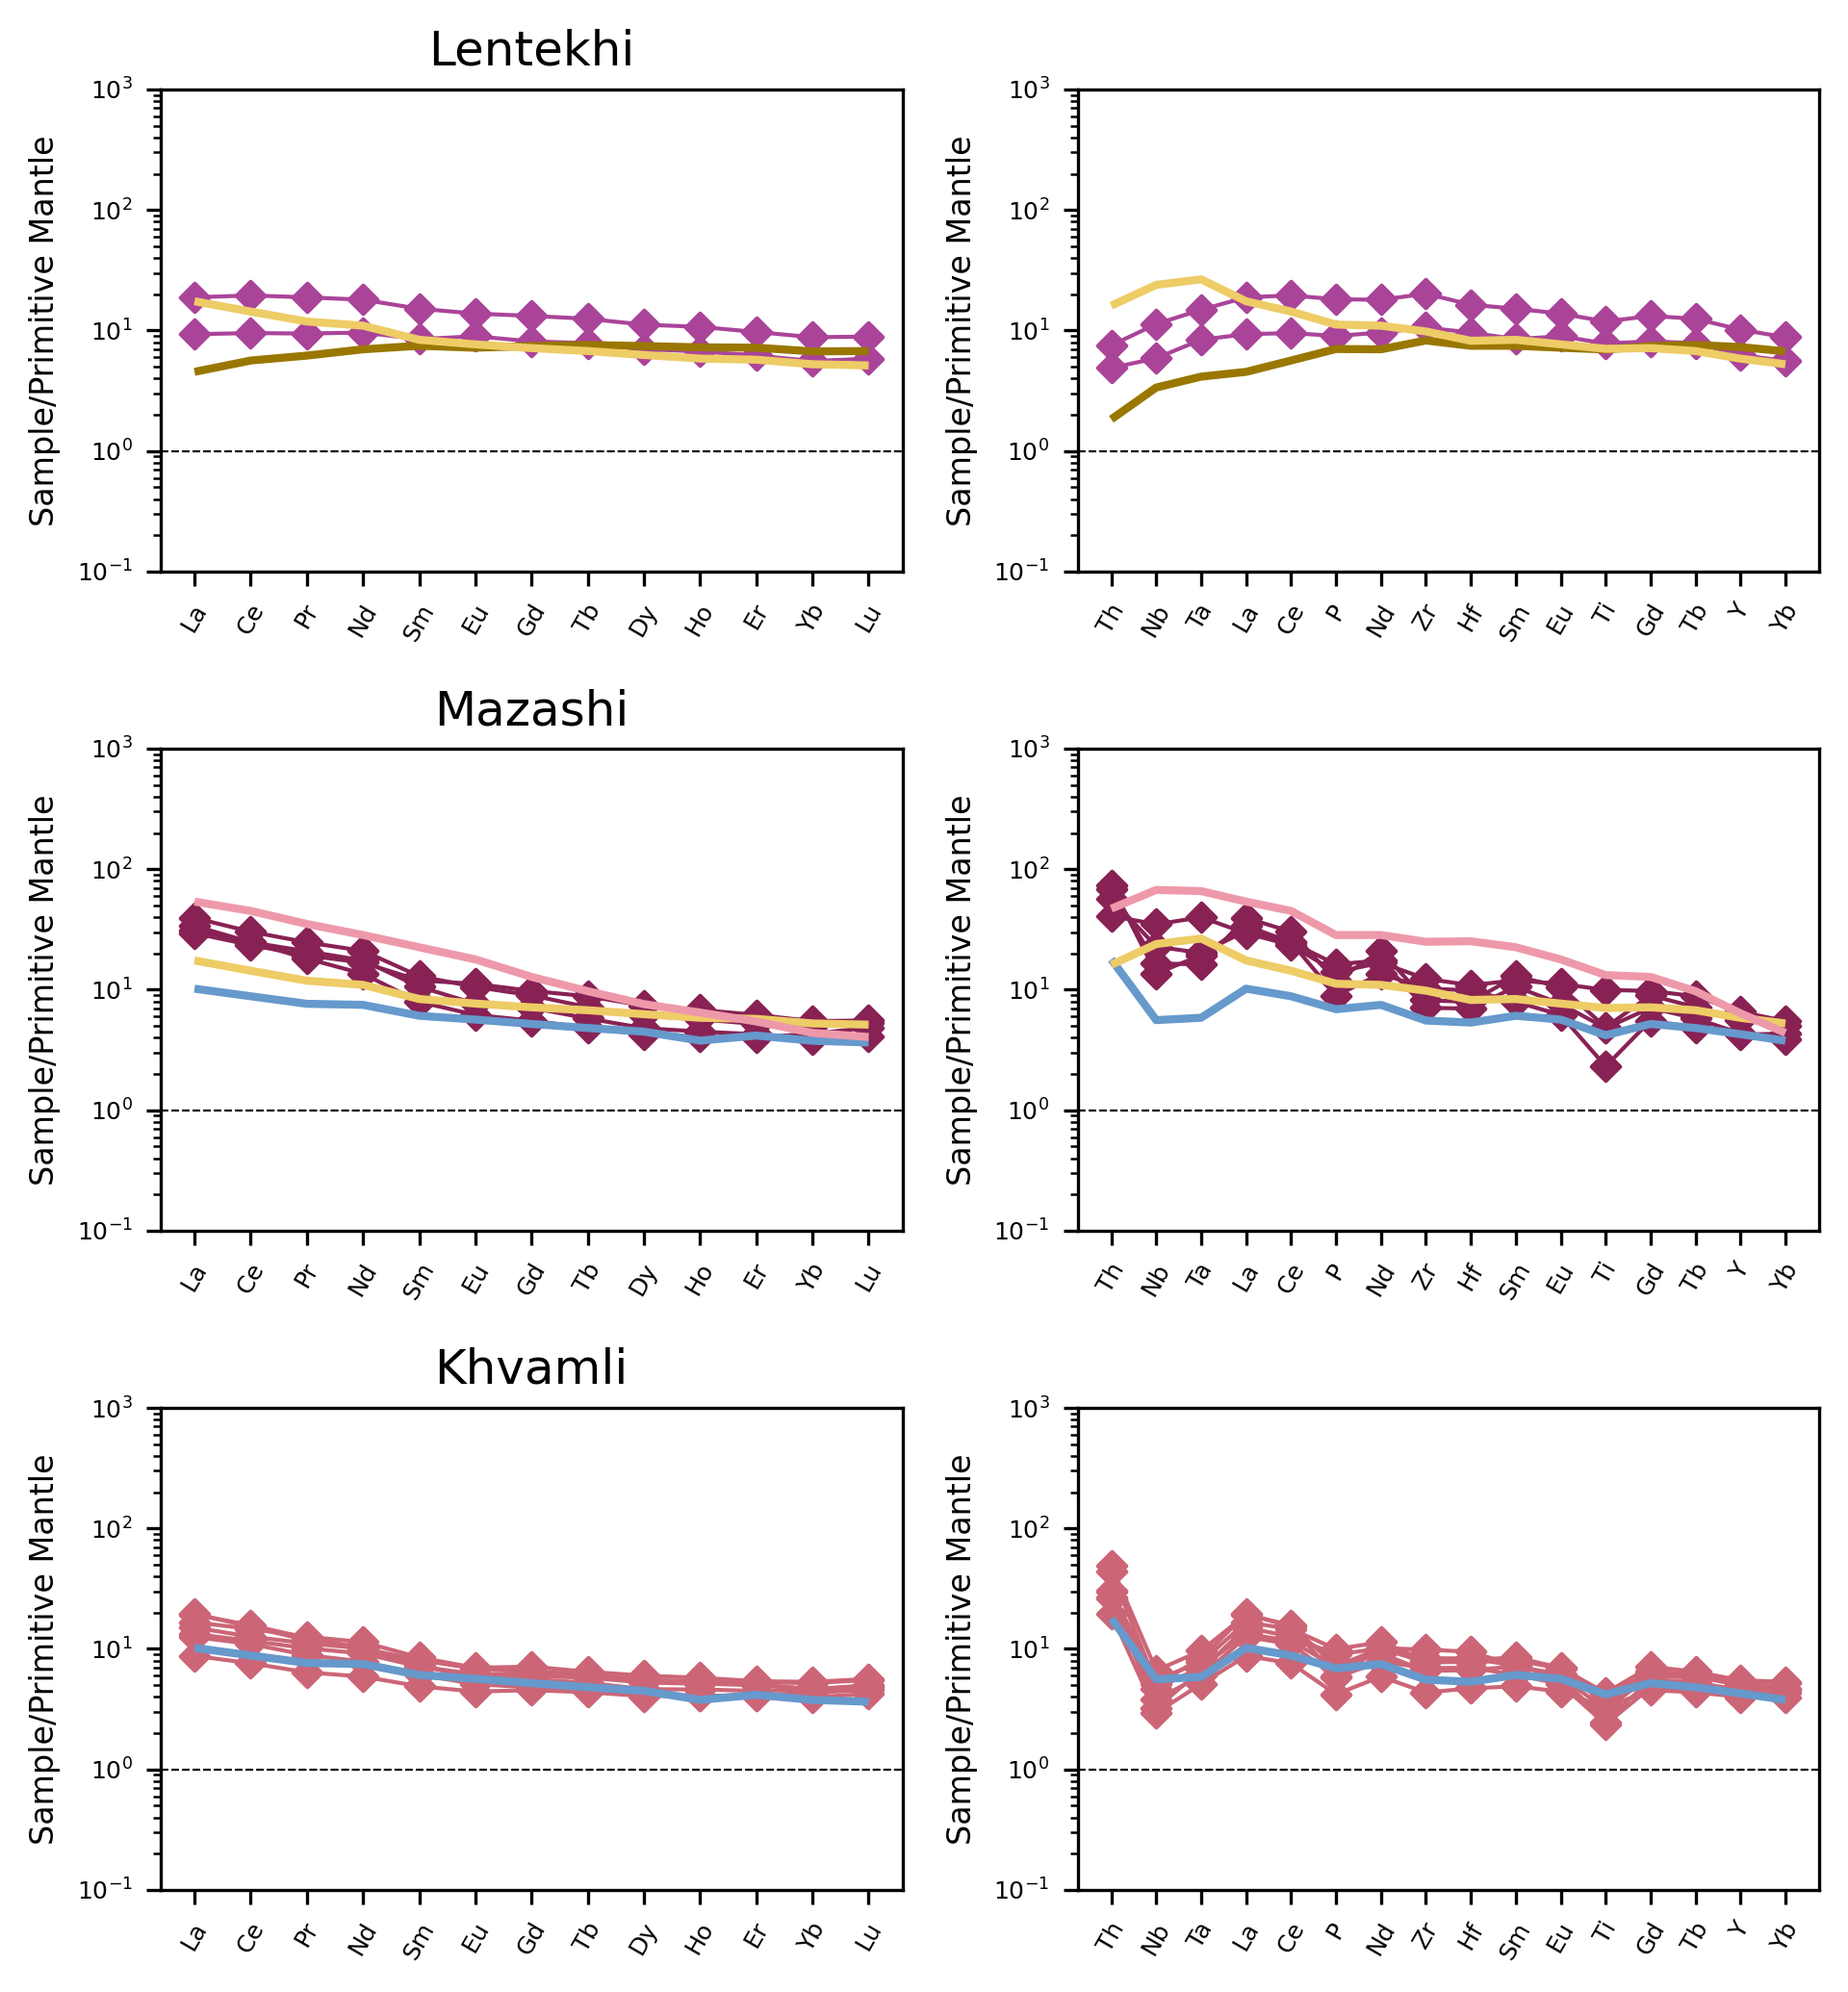

In [12]:
# Spiders

fig0,axs0 = plt.subplots(3,2,figsize=(6.5,7),dpi=300)
fig1,axs1 = plt.subplots(3,2,figsize=(6.5,7),dpi=300)

axs_all = [axs0,axs1]

for k, group in groups:
    fignum = axes_dict[k][1]
    axs = axs_all[fignum]

    ax0 = axs[(axes_dict[k][0],0)]
    ax1 = axs[(axes_dict[k][0],1)]

    ax0.set_title(k)

    gp.REE(group,ax=ax0,c=color_dict[k],label=k)
    gp.immobile(group,ax=ax1,c=color_dict[k],label=k)

axs0[0,0].set_title('Khaishi')
axs0[0,0].legend(fontsize=6,loc='upper right',frameon=True,framealpha=1,facecolor='white')

avgs_list = [['Oceanic Arc','E-MORB','OIB'],['Oceanic Arc'],['Oceanic Arc'],['D-MORB','E-MORB'],['Oceanic Arc','E-MORB','OIB'],['Oceanic Arc']]


for k,ax in enumerate(axs0[:,0]):
    labels = avgs_list[k]
    colors = [avgs_colors[label] for label in labels]
    gp.REE(avgs.loc[labels],ax=ax,marker=None,zorder=2,color=colors,labels=labels,linewidth=2)
for k,ax in enumerate(axs0[:,1]):
    labels = avgs_list[k]
    colors = [avgs_colors[label] for label in labels]
    gp.immobile(avgs.loc[labels],ax=ax,marker=None,zorder=2,color=colors,labels=labels,linewidth=2)
for k,ax in enumerate(axs1[:,0]):
    labels = avgs_list[k+3]
    colors = [avgs_colors[label] for label in labels]
    gp.REE(avgs.loc[labels],ax=ax,marker=None,zorder=2,color=colors,labels=labels,linewidth=2)
for k,ax in enumerate(axs1[:,1]):
    labels = avgs_list[k+3]
    colors = [avgs_colors[label] for label in labels]
    gp.immobile(avgs.loc[labels],ax=ax,marker=None,zorder=2,color=colors,labels=labels,linewidth=2)

fig0.set_layout_engine('tight')
fig1.set_layout_engine('tight')

fig0.savefig(savedir+'F06_westspiders.pdf')
fig1.savefig(savedir+'F07_eastspiders.pdf')

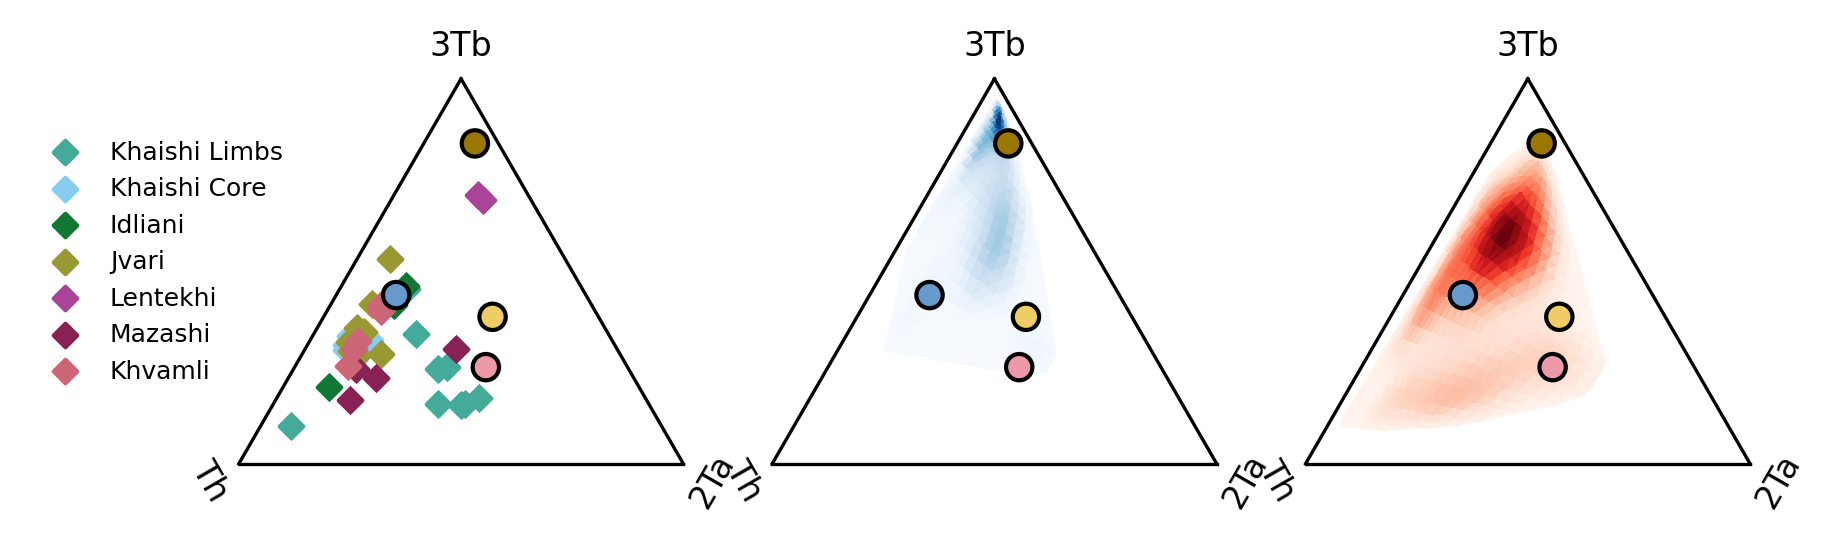

In [13]:
# Cabanis
fig,axs = plt.subplots(1,3,figsize=(6.5,3),dpi=300,subplot_kw={'projection':'ternary'})

first = []
for k,group in groups:
    ax = axs[0]
    Tb,Th,Ta = group[['Tb','Th','Ta']].T.values
    gp.cabanis(Tb,Th,Ta,ax=ax,label=k,c=color_dict[k])

gp.cabanisd(gale['Tb'],gale['Th'],gale['Ta'],ax=axs[1],cmap='Blues')
gp.cabanisd(cbab_spread['Tb'],cbab_spread['Th'],cbab_spread['Ta'],ax=axs[2],cmap='Reds')

for ax in axs:
    colors = [avgs_colors[label] for label in avgs.index]
    gp.cabanis(avgs['Tb'],avgs['Th'],avgs['Ta'],ax=ax,c=colors,marker='o',s=40,edgecolor='black')

axs[0].legend(fontsize=6,loc='best',bbox_to_anchor=(0.15,0.9))

fig.savefig(savedir+'F08_cabanis.pdf')

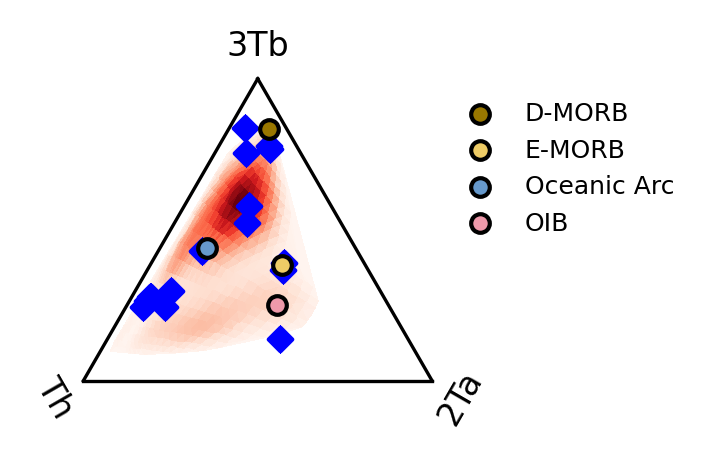

In [14]:
# Cabanis with McCann
fig,axs = plt.subplots(1,figsize=(1.5,1.5),dpi=300,subplot_kw={'projection':'ternary'})

first = []

gp.cabanisd(cbab_spread['Tb'],cbab_spread['Th'],cbab_spread['Ta'],ax=axs,cmap='Reds')
Tb,Th,Ta = mc[['Tb','Th','Ta']].T.values
gp.cabanis(Tb,Th,Ta,ax=axs,c='blue')

for k,row in avgs.iterrows():
    color = avgs_colors[k]
    label = k
    gp.cabanis(row['Tb'],row['Th'],row['Ta'],ax=axs,c=color,marker='o',s=20,edgecolor='black',label=label)

axs.legend(fontsize=6)

fig.savefig(savedir+'mccann_cabanis.pdf')

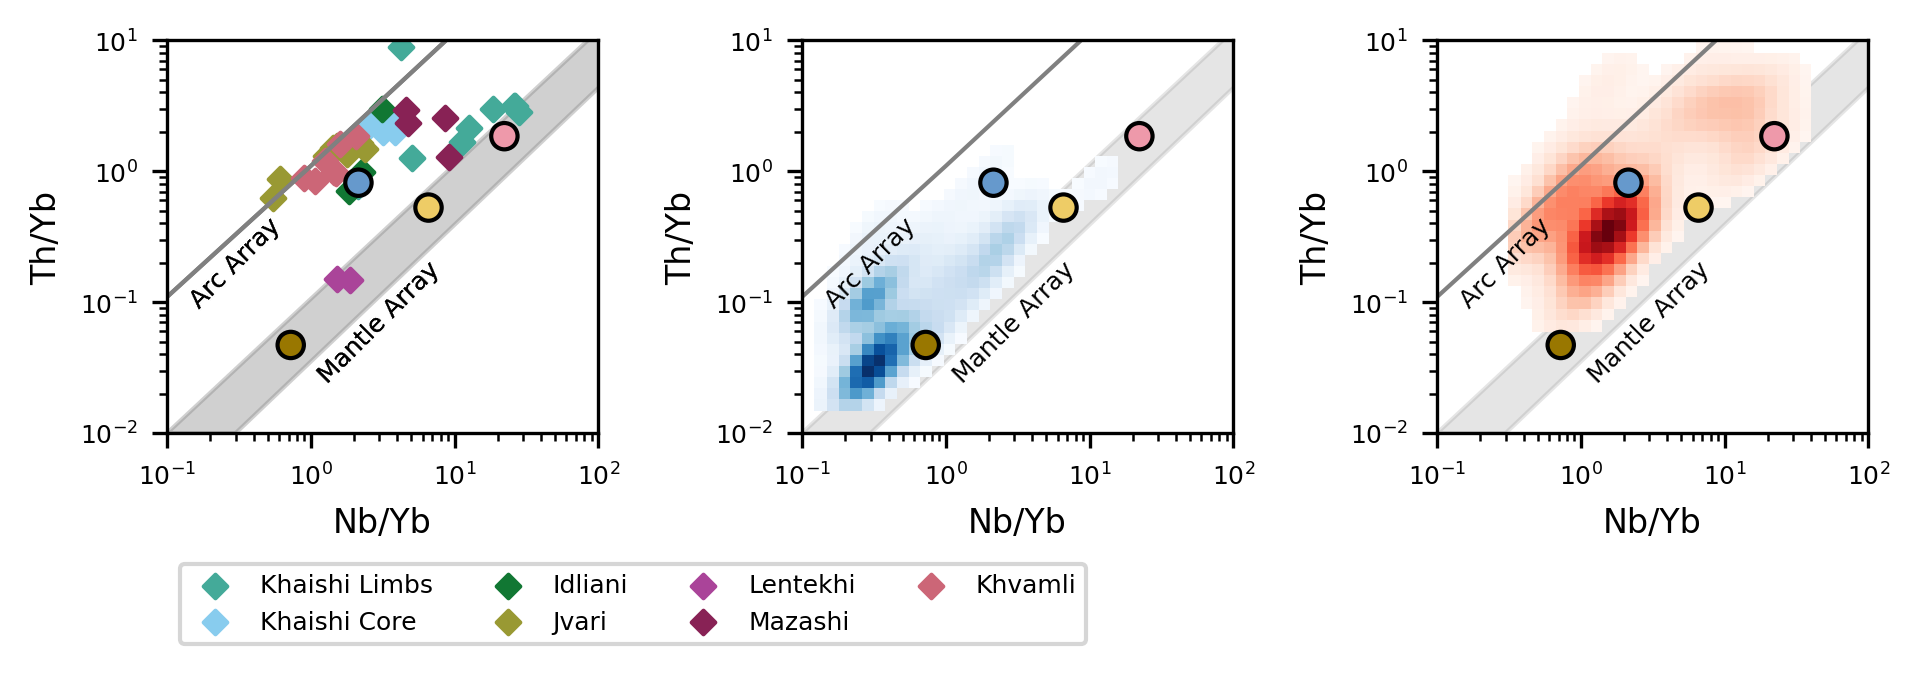

In [15]:
# Mantle Array
fig,axs = plt.subplots(1,3,figsize=(6.5,2),dpi=300)

first = []
for k,group in groups:
    ax = axs[0]
    Th,Nb,Yb = group[['Th','Nb','Yb']].T.values
    gp.mantle_array(Th,Nb,Yb,ax=ax,scatter_kwargs={'label':k,'c':color_dict[k]},first=first)

gp.mantle_array(gale['Th'],gale['Nb'],gale['Yb'],ax=axs[1],scatter=False,density=True,
                density_kwargs={'cmap':'Blues'},first=[])
gp.mantle_array(cbab_spread['Th'],cbab_spread['Nb'],cbab_spread['Yb'],ax=axs[2],scatter=False,
                density=True,density_kwargs={'cmap':'Reds'},first=[])

for ax in axs:
    colors = [avgs_colors[label] for label in avgs.index]
    gp.mantle_array(avgs['Th'],avgs['Nb'],avgs['Yb'],ax=ax,
                    scatter_kwargs={'c':colors,'marker':'o','s':40,'edgecolor':'black'})

    ax.xaxis.get_label().set_fontsize(8)
    ax.yaxis.get_label().set_fontsize(8)
    ax.tick_params(axis='both', which='major', labelsize=6)

plt.tight_layout()
lgd = axs[0].legend(fontsize=6,loc='best',bbox_to_anchor=(0,-0.3),frameon=True,facecolor='white',
              ncols=4)

fig.savefig(savedir+'F09_mantlearray.pdf',bbox_extra_artists=(lgd,),bbox_inches='tight')

In [16]:
# Combine PDFs
pdfs = [savedir+x for x in os.listdir(savedir) if x.startswith('F0')]
pdfs.sort()

merger = PdfWriter()
for pdf in pdfs:
    merger.append(pdf)
merger.write(savedir+'merged_gchem.pdf')
merger.close()